### Pyber Ride Sharing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
city_data = "city_data.csv"
ride_data = "ride_data.csv"

city = pd.read_csv(city_data)
ride = pd.read_csv(ride_data)

city_ride = pd.merge(city,ride, on = "city", how = "left")
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [4]:
urban_type = city_ride[city_ride["type"] == "Urban"]
suburban_type = city_ride[city_ride["type"] == "Suburban"]
rural_type = city_ride[city_ride["type"] == "Rural"]

In [5]:
urban_avg_fare = urban_type.groupby(["city"]).mean()["fare"]
urban_rides_count = urban_type.groupby(["city"]).count()["ride_id"]
urban_driver_count = urban_type.groupby(["city"]).mean()["driver_count"]

suburban_avg_fare = suburban_type.groupby(["city"]).mean()["fare"]
suburban_rides_count = suburban_type.groupby(["city"]).count()["ride_id"]
suburban_driver_count = suburban_type.groupby(["city"]).mean()["driver_count"]

rural_avg_fare = rural_type.groupby(["city"]).mean()["fare"]
rural_rides_count = rural_type.groupby(["city"]).count()["ride_id"]
rural_driver_count = rural_type.groupby(["city"]).mean()["driver_count"]

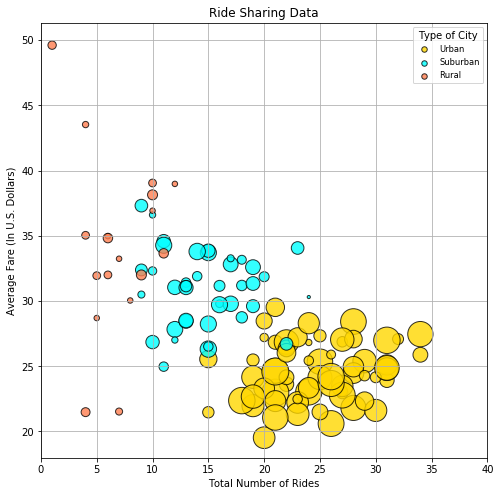

In [6]:
plt.figure(figsize = (8,8))

plt.scatter(urban_rides_count, urban_avg_fare,  s=10*urban_driver_count, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban", color = "Gold")

plt.scatter(suburban_rides_count, suburban_avg_fare, s=10*suburban_driver_count,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban", color = "Aqua")

plt.scatter(rural_rides_count, rural_avg_fare, s=10*rural_driver_count, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural", color = "Coral")

plt.title("Ride Sharing Data")
plt.ylabel("Average Fare (In U.S. Dollars)")
plt.xlabel("Total Number of Rides")
plt.xlim(0,40)
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", scatterpoints=1, loc="best", title="Type of City")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

### Pie Charts

## Total Fares by City Type

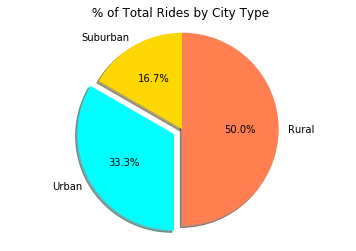

In [22]:
type_percent = 100*city_ride.groupby(["type"]).count()["ride_id"] / city_ride["ride_id"].count()

labels = ["Suburban", "Urban", "Rural"]
explode = (0,0.1,0)
sizes = [15, 30, 45]
colors = ["Gold", "Aqua", "Coral"]
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)

plt.title(" % of Total Rides by City Type")
ax1.axis('equal')

plt.show()

## Total Rides by City Type

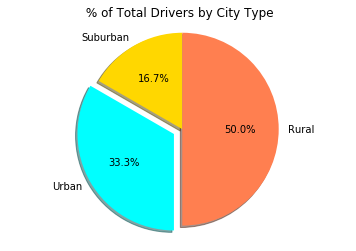

In [16]:
type_percent = 100*city_ride.groupby(["type"]).count()["ride_id"] / city_ride["ride_id"].count()

labels = ["Suburban", "Urban", "Rural"]
explode = (0,0.1,0)
sizes = [15, 30, 45]
colors = ["Gold", "Aqua", "Coral"]
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)
plt.title(" % of Total Drivers by City Type")
ax1.axis('equal')

plt.show()

## Drivers by City Type

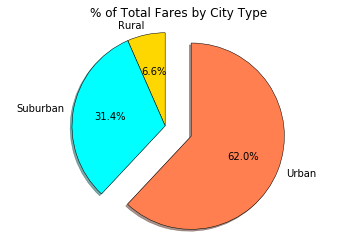

In [15]:
#group by type to be used by all pie charts
by_type = city_ride.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()